In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load fashion Mnist data from keras datasets

In [2]:
fashion_data=keras.datasets.fashion_mnist.load_data()
(x_train,y_train),(x_val,y_val)=fashion_data

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_val.shape,y_val.shape

((10000, 28, 28), (10000,))

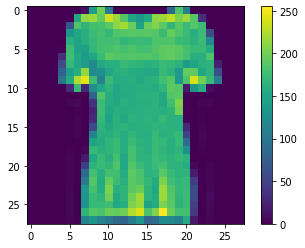

In [5]:
plt.imshow(x_train[10])
plt.colorbar()
plt.show()

In [6]:
x_train=x_train/255.0
x_val=x_val/255.0

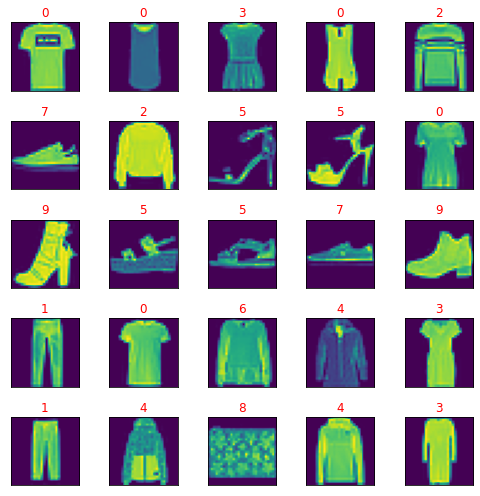

In [7]:
plt.figure(figsize=(7,7))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(x_train[i])
  plt.title(y_train[i],color='r')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()


In [8]:
x_train=tf.expand_dims(x_train,axis=-1)
x_val=tf.expand_dims(x_val,axis=-1)

In [14]:
classifier=keras.models.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),#Convolution layer
                                    keras.layers.Flatten(),#Flattening layer
                                    keras.layers.Dense(128,activation='relu'),#dense hidden layer
                                    keras.layers.Dense(10,activation='softmax')#dense output layer
                                    ])

In [15]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [16]:
classifier.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [17]:
history=classifier.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.3681 - accuracy: 0.8680 - val_loss: 0.3002 - val_accuracy: 0.8893
Epoch 2/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.2366 - accuracy: 0.9122 - val_loss: 0.3111 - val_accuracy: 0.8908
Epoch 3/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.1777 - accuracy: 0.9344 - val_loss: 0.2681 - val_accuracy: 0.9053
Epoch 4/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.1323 - accuracy: 0.9506 - val_loss: 0.2882 - val_accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0969 - accuracy: 0.9642 - val_loss: 0.3133 - val_accuracy: 0.9107
Epoch 6/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0688 - accuracy: 0.9749 - val_loss: 0.3593 - val_accuracy: 0.9040
Epoch 7/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0524 - accuracy: 0.9814 - val_loss: 0

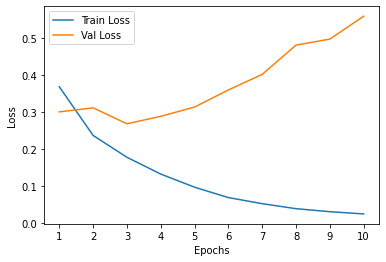

In [19]:
hist=pd.DataFrame(history.history)
epochs=np.arange(1,11)
plt.plot(epochs,hist['loss'],label='Train Loss')
plt.plot(epochs,hist['val_loss'],label='Val Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.show()

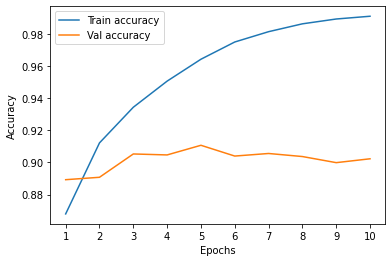

In [20]:
epochs=np.arange(1,11)
plt.plot(epochs,hist['accuracy'],label='Train accuracy')
plt.plot(epochs,hist['val_accuracy'],label='Val accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.show()